In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income-dataset/adult.csv


In [58]:
census_data = pd.read_csv('/kaggle/input/adult-census-income-dataset/adult.csv')
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [59]:
census_data.shape # tells you the number of rows and columns in the dataset

(32561, 15)

In [60]:
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [61]:
census_data.columns # will give the list of the features or the columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [62]:
census_data.info() # tells you the data types, counts and null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
census_data.describe() # gives you the stats for all the integer features only

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [64]:
# There are some extra characters in these features and all of those records are being removed from the original dataset.
census_data = census_data[census_data['workclass'].str.contains("\?") == False]
census_data = census_data[census_data['occupation'].str.contains("\?") == False]
census_data = census_data[census_data['native.country'].str.contains("\?") == False]
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [65]:
# Notice that the number of records has reduced. You can use either of the statements below
census_data.shape

(30162, 15)

In [66]:
print(len(census_data))

30162


In [67]:
#one-hot encoding
census_data = pd.get_dummies(census_data,drop_first=True)
census_data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
6,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [68]:
x=census_data.iloc[:,:-1] # all the input features
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,257302,12,0,0,38,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,154374,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,151910,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [69]:
y=census_data.iloc[:,-1]
y # only the target variable

1        False
3        False
4        False
5        False
6        False
         ...  
32556    False
32557    False
32558     True
32559    False
32560    False
Name: income_>50K, Length: 30162, dtype: bool

In [70]:
##Decision Tree Implementation 

In [71]:
#Implementation 1 - with no pruning -overfitting issue -80% accuracy

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2, random_state=30)

In [73]:
dt_clf =DecisionTreeClassifier(random_state=30)
dt_clf =dt_clf.fit(x_train,y_train)

In [74]:
test_pred = dt_clf.predict(x_test)
test_pred

array([False, False, False, ..., False, False, False])

In [75]:
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

       False       0.87      0.86      0.87     18158
        True       0.59      0.60      0.60      5972

    accuracy                           0.80     24130
   macro avg       0.73      0.73      0.73     24130
weighted avg       0.80      0.80      0.80     24130



In [76]:
#Implementation 2 - with pruning- using ccp_alpha in decision tree - 80% accuracy

In [77]:
dt_clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.0001)
dt_clf.fit(x_train,y_train)
test_pred = dt_clf.predict(x_test)
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

       False       0.87      0.86      0.87     18189
        True       0.59      0.60      0.60      5941

    accuracy                           0.80     24130
   macro avg       0.73      0.73      0.73     24130
weighted avg       0.80      0.80      0.80     24130



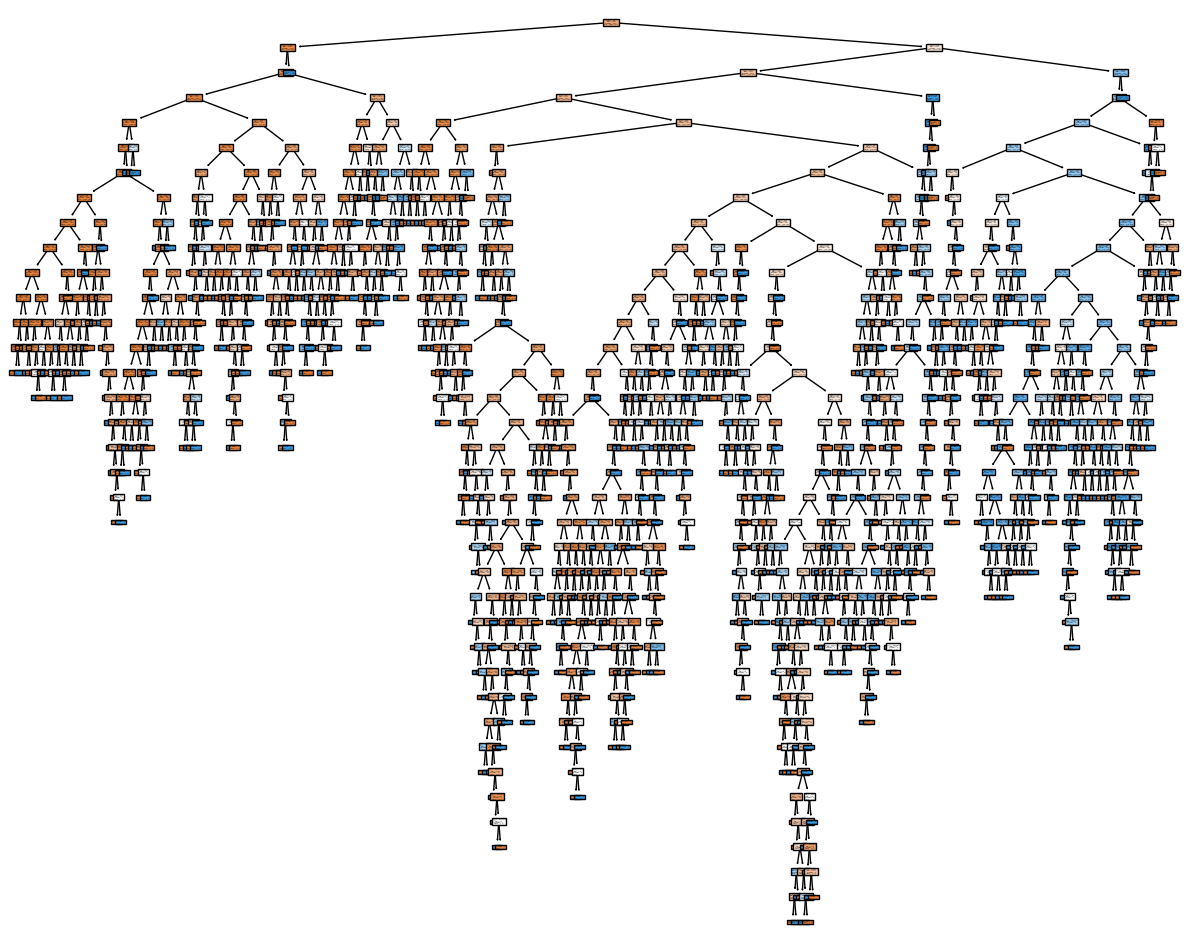

In [78]:
plt.figure(figsize=(15,12))
plot_tree(dt_clf,filled=True)
plt.show()

In [79]:
#Implementation Three - with pruning ccp_alpha=0.01 - 84% accuracy

In [80]:
dt_clf = DecisionTreeClassifier(random_state=30, ccp_alpha=0.001)
dt_clf = dt_clf.fit(x_train,y_train)
test_pred=dt_clf.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

       False       0.94      0.86      0.90     19806
        True       0.54      0.76      0.63      4324

    accuracy                           0.84     24130
   macro avg       0.74      0.81      0.77     24130
weighted avg       0.87      0.84      0.85     24130



In [81]:
#Random Forest Classifier

In [82]:
#Implementation 1- with no pruning - 84% accuracy

In [83]:
rf_clf = RandomForestClassifier(random_state=30)
rf_clf.fit(x_train,y_train)
test_pred=rf_clf.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

       False       0.92      0.87      0.90     19031
        True       0.60      0.72      0.66      5099

    accuracy                           0.84     24130
   macro avg       0.76      0.80      0.78     24130
weighted avg       0.85      0.84      0.85     24130



In [84]:
#Implementation 2- with n_estimators - 84% accuracy

In [85]:
rf_clf = RandomForestClassifier(random_state=30, n_estimators = 80)
rf_clf.fit(x_train,y_train)
test_pred=rf_clf.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

       False       0.92      0.87      0.90     19015
        True       0.61      0.72      0.66      5115

    accuracy                           0.84     24130
   macro avg       0.76      0.80      0.78     24130
weighted avg       0.85      0.84      0.85     24130



In [86]:
#Implementation 3- with ccp_alpha - 84% accuracy

In [87]:
rf_clf = RandomForestClassifier(random_state=30, ccp_alpha = 0.0001)
rf_clf.fit(x_train,y_train)
test_pred=rf_clf.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

       False       0.92      0.87      0.90     19019
        True       0.61      0.72      0.66      5111

    accuracy                           0.84     24130
   macro avg       0.76      0.80      0.78     24130
weighted avg       0.85      0.84      0.85     24130

